Introduction to ML on my dataset

In [26]:
import csv
import math
import pysiology as pyd
import pandas as pd
import pysiology as pysiology
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn import svm, preprocessing
from sklearn.ensemble import RandomForestClassifier
import  neurokit as nk
import neurokit2 as nk2
import matplotlib.pyplot as plt
import statistics
import heartpy as hp
import numpy as np
import scipy as sci

importing and reading the head of the processed data given by Ryan

In [2]:
ecg = pd.read_csv('./given_data/ecg.csv')
gsr = pd.read_csv('./given_data/gsr.csv')
labels = pd.read_csv('./given_data/labels.csv')

#removing unnecessary columns from data and concatenating into one dataset

gsr.drop(['gfgb'], axis=1,inplace=True)
ecg = ecg[['maxRR','minRR','meanRR','medianRR']]

dataset = pd.concat([ecg,gsr,labels], axis=1, join='inner').sort_index()
dataset.dropna()
dataset.head()


,maxRR,minRR,meanRR,medianRR,mean,variance,standard deviation,number of peaks,number of valleys,max,min,ratio of peak to time,labels
0,3.283373,-3.153124,-0.691292,-0.473422,-0.887344,-0.852428,-1.101827,-1.146055,-1.211860,-0.971536,0.473535,-1.240391,1
1,-0.530691,0.220757,-0.097092,-0.060457,1.728917,0.115263,0.413781,0.225144,0.150496,1.275972,1.869222,0.439346,0
2,-0.256929,0.437686,0.543713,0.614798,-0.219067,-0.241879,0.038038,0.613467,0.536314,-0.453982,-1.301779,1.602390,0
3,0.000886,0.828158,1.557349,1.368181,1.520551,0.954914,1.091541,0.643759,0.566410,1.668803,0.274025,0.478224,3
4,-0.153271,0.266695,0.508760,0.553411,-1.314357,-0.838620,-1.044152,-0.255806,-0.327352,-1.237303,-0.186352,-0.860474,1


Looking at the ecg plots

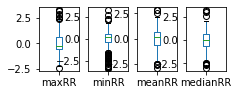

In [3]:
ecg.plot(kind='box', subplots=True, layout=(3,7), sharex=False, sharey=False)
pyplot.show()

Looking at the gsr plots

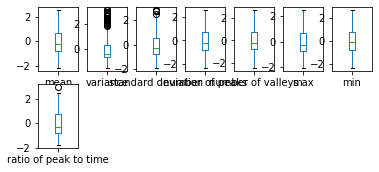

In [4]:
gsr.plot(kind='box', subplots=True, layout=(3,7), sharex=False, sharey=False)
pyplot.show()

Now looking for dataset

In [5]:
X = dataset.drop('labels', axis=1)
y = dataset['labels']

Random Forest

In [6]:
rfc = RandomForestClassifier(n_estimators=500)
y_pred = cross_val_predict(rfc, X,y, cv=10)
print(classification_report(y, y_pred))



              precision    recall  f1-score   support

           0       0.56      0.62      0.59        78
           1       0.60      0.69      0.64        78
           2       0.60      0.46      0.52        78
           3       0.75      0.73      0.74        78

    accuracy                           0.62       312
   macro avg       0.63      0.62      0.62       312
weighted avg       0.63      0.62      0.62       312



SVM

In [7]:
clf = svm.SVC()
y_pred = cross_val_predict(clf, X,y, cv=10)
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.48      0.50      0.49        78
           1       0.53      0.58      0.55        78
           2       0.46      0.47      0.47        78
           3       0.75      0.63      0.69        78

    accuracy                           0.54       312
   macro avg       0.56      0.54      0.55       312
weighted avg       0.56      0.54      0.55       312



Now doing both Random Forest and SVM but now with the eye tracking data provided

In [36]:
ecg = pd.read_csv('./given_data/ecg.csv')
gsr = pd.read_csv('./given_data/gsr.csv')
labels = pd.read_csv('./given_data/labels.csv')

#removing unnecessary columns from data and concatenating into one dataset

gsr.drop(['gfgb'], axis=1,inplace=True)
ecg = ecg[['maxRR','minRR','meanRR','medianRR']]
eyes = pd.read_csv('./given_data/eye.csv')
dataset = pd.concat([ecg,gsr,eyes,labels], axis=1, join='inner').sort_index()
dataset.dropna()
X = dataset.drop('labels', axis=1)
y = dataset['labels']


clf = svm.SVC()
y_pred = cross_val_predict(clf, X,y, cv=10)
print("SVM classification report")
print(classification_report(y, y_pred))

rfc = RandomForestClassifier(n_estimators=1000)
y_pred = cross_val_predict(rfc, X,y, cv=10)
print("Random Forest classification report")
print(classification_report(y, y_pred))


SVM classification report
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        78
           1       0.71      0.77      0.74        78
           2       0.71      0.73      0.72        78
           3       0.78      0.74      0.76        78

    accuracy                           0.73       312
   macro avg       0.74      0.73      0.73       312
weighted avg       0.74      0.73      0.73       312

Random Forest classification report
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        78
           1       0.74      0.78      0.76        78
           2       0.71      0.72      0.71        78
           3       0.79      0.82      0.81        78

    accuracy                           0.76       312
   macro avg       0.76      0.76      0.76       312
weighted avg       0.76      0.76      0.76       312



Now importing classes to process own raw data


In [4]:
import pickle 
import os
from os import listdir

data = []
# Getting all the files in the data directory
files = os.listdir("./raw_data/")
removed = ['101_PreProcessed_GSR_ECG.dat', '102_PreProcessed_GSR_ECG.dat', '103_PreProcessed_GSR_ECG.dat', '115_PreProcessed_GSR_ECG.dat', '118_PreProcessed_GSR_ECG.dat', '121_PreProcessed_GSR_ECG.dat', '119_PreProcessed_GSR_ECG.dat', '130_PreProcessed_GSR_ECG.dat']

for item in removed:
    files.remove(item)

for i in range(len(files)):
    infile = open("./raw_data/" + files[i],'rb')
    data.append(pickle.load(infile))
    infile.close()

# Extracting all data (labels, ecg and gsr data) into seperate arrays.

completeLabels = []
completeEcg = []
completeGsr = []

# Iterate over all files
for i in range(len(data)):
    del data[i]['Data'][0]
    del data[i]['Labels'][0]
    features = data[i]['Data']
    labels = data[i]['Labels']
    #Iterate over all examples in file
    for x in range(len(labels)):
        completeLabels.append(labels[x])
        completeEcg.append(features[x][:][:,1])
        completeGsr.append(features[x][:][:,0])


labelslen = len(completeLabels)
ecglen = len(completeEcg)
gsrlen = len(completeGsr)
print(f"Completed:{labelslen} lables, {ecglen} ECG inputs, {gsrlen} GSR inputs")

Completed:312 lables, 312 ECG inputs, 312 GSR inputs


Using NeuroKit to extract data points


   ECG_Rate_Mean  HRV_RMSSD   HRV_MeanNN    HRV_SDNN   HRV_SDSD  HRV_CVNN  \
0      38.822023  43.722541  1545.630631  113.994596  43.801921  0.073753   

   HRV_CVSD  HRV_MedianNN  HRV_MadNN  HRV_MCVNN  ...   HRV_C2d   HRV_C2a  \
0  0.028288        1571.5   108.2298    0.06887  ...  0.512351  0.487649   

     HRV_SD2d   HRV_SD2a    HRV_Cd    HRV_Ca  HRV_SDNNd  HRV_SDNNa  HRV_ApEn  \
0  113.061287  110.30202  0.511176  0.488824  81.376768  79.577661  0.941039   

   HRV_SampEn  
0    1.215072  

[1 rows x 53 columns]


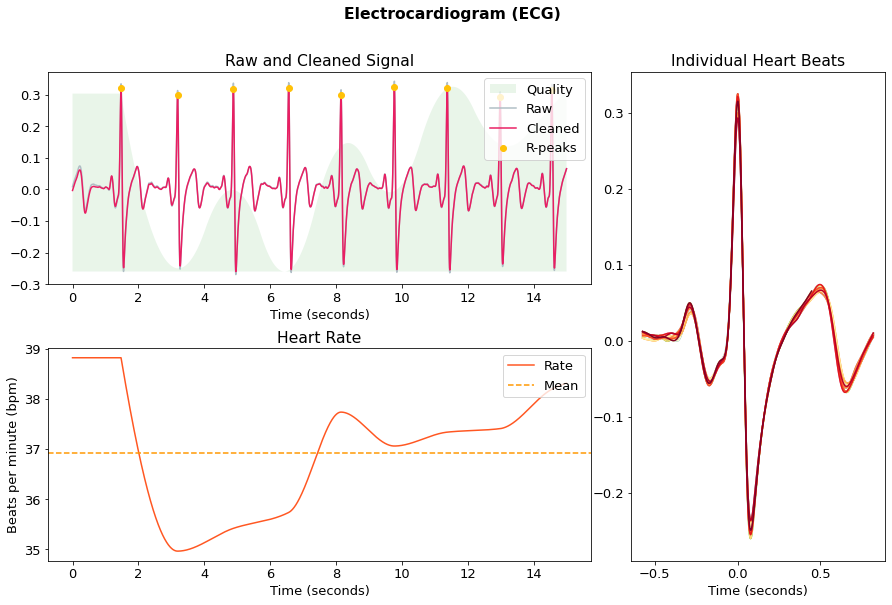

In [15]:
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images
plt.rcParams['font.size']= 13


arr = completeEcg[5]
samplerate = 1000

sig = hp.filter_signal(arr, 10, samplerate)#filter the signal with a cutoff at 2.5Hz and a 5th order Butterworth filter
ecg_signals, info = nk2.ecg_process(sig, sampling_rate=1000)
plot = nk2.ecg_plot(ecg_signals[:15000], sampling_rate=1000)
     #extracts processes the raw ecg signals
compecgdata = nk2.ecg_intervalrelated(ecg_signals, sampling_rate=1000)# makes a dataframe of analyzed ECG features
print(compecgdata)
    # Process the signal using previously defined function
    #plot = nk.ecg_plot(processed_ecg[:30000], sampling_rate=1000)
    #print(compecgdata)
    # Visualize
    #plot = nk.ecg_plot(compecgdata)


In [36]:
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images
plt.rcParams['font.size']= 13

def nkExtractECG(signal,samplerate):
    cleaned = nk2.ecg_clean(signal,sampling_rate=samplerate)
    processed, info = nk2.ecg_process(cleaned,sampling_rate=samplerate)
    compECG = nk2.ecg_intervalrelated(processed)
    return compECG

def extractECGfeatures(samplerate):
    print("started ECG extraction")
    # Preprocess the data (filter, find peaks, etc.)
    completeFrame = pd.DataFrame([])

    for index, ecg in enumerate(completeEcg): #loops through all 398 data items from the extracted items

        tems = nkExtractECG(ecg,samplerate)
        #temp = pd.DataFrame([tems])
        completeFrame = pd.concat([completeFrame,tems])
    #completeFrame.drop(completeFrame.columns[0], axis=1,inplace=True) #removes first empty column
    completeFrame.to_csv('processed_data/ecgNK.csv')
    print("Completed ECG extraction")


def extractGSR(signal,samplerate):
    signal = hp.filter_signal(signal, 0.1, 1000)
    processed_gsr,infos = nk2.eda_process(signal,sampling_rate=samplerate) #processes the GSR, currently only doing one item to make sure it works properly
    #plot = nk2.eda_plot(processed_gsr[:30000], sampling_rate=1000) #plots the signal on a graph

    gsr_dict = nk2.eda_findpeaks(processed_gsr)#finding peaks, time of the peaks and magnitude of peaks

    numpeakssci = len(sci.signal.find_peaks(signal)[0])
    numvalleys = len(sci.signal.find_peaks(signal*(-1))[0])

    peaktime = gsr_dict['SCR_Peaks'] #time of peaks
    numpeaks = len(peaktime) #number of peaks
    timebetween = []
    lastPeak = 0;
    for peaks in peaktime: # going through all the peaks in the exrtacted data
        if lastPeak != 0:
            timebetween.append(peaks-lastPeak) #finding the time between the peaks
        else:
            lastPeak = peaks

    if len(timebetween) >= 1:
        meantbpeaks = statistics.mean(timebetween) #mean time between peaks
        mediantbpeaks = statistics.median(timebetween) # median time between peaks
        meanheightpeaks = statistics.mean(gsr_dict['SCR_Height']) #mean magnitide of peaks
        medianheightpeaks = statistics.median(gsr_dict['SCR_Height']) #median magnitide of peaks
        varheightpeaks = statistics.variance(gsr_dict['SCR_Height']) #variance magnitide of peaks
    elif len(gsr_dict['SCR_Height']) >= 1:
        meantbpeaks = 0 #mean time between peaks
        mediantbpeaks = 0 # median time between peaks
        meanheightpeaks = statistics.mean(gsr_dict['SCR_Height']) #mean magnitide of peaks
        medianheightpeaks = statistics.median(gsr_dict['SCR_Height']) #median magnitide of peaks
        if len(gsr_dict['SCR_Height']) >= 2:
            varheightpeaks = statistics.variance(gsr_dict['SCR_Height']) #variance magnitide of peaks
        else:
            varheightpeaks = 0
    else:
        meantbpeaks = 0 #mean time between peaks
        mediantbpeaks = 0 # median time between peaks
        meanheightpeaks = 0 #mean magnitide of peaks
        medianheightpeaks = 0 #median magnitide of peaks
        varheightpeaks = 0 #variance magnitide of peaks

    maxGSR = max(signal)
    minGSR = min(signal)
    meanGSR = statistics.mean(signal)
    peakratio = 0
    if numpeaks>0: peakratio = numpeaks/len(signal)
    valleyratio =0
    if numvalleys>0: valleyratio = numvalleys/len(signal)

    d = {'max GSR': maxGSR,
         'min GSR': minGSR,
         'mean GSR': meanGSR,
         'number of peaks':numpeaks,
         'number of peaks SCIPY': numpeakssci,
         'number of valleys': numvalleys,
         'mean time between peaks':meantbpeaks,
         'median time between peaks':mediantbpeaks,
         'mean height of peaks': meanheightpeaks,
         'median height of peaks': medianheightpeaks,
         'variance height of peaks': varheightpeaks,
         'ratio of peaks': peakratio,
         'ratio of valleys': valleyratio}
    #adding to dataframe to be stored as csv later
    return pd.DataFrame([d])

def extractGSRfeatures(samplerate):
    print("started GSR extraction")
     # Preprocess the data (filter, find peaks, etc.)
    completeFrame = pd.DataFrame([])

    for index, gsr in enumerate(completeGsr): #loops through all 398 data items from the extracted items

        temp = extractGSR(gsr,samplerate)
        completeFrame = pd.concat([completeFrame,temp])
    #completeFrame.drop(completeFrame.columns[0], axis=1,inplace=True) #removes first empty column
    completeFrame.to_csv('processed_data/gsrNK.csv')
    print("Completed GSR extraction")
samplerate = 1000
extractGSRfeatures(samplerate)
#extractECGfeatures(samplerate)

started GSR extraction
Completed GSR extraction


C:\Users\tomje\AppData\Local\Programs\Python\Python39\lib\site-packages\neurokit2\eda\eda_peaks.py:114: RuntimeWarning: All-NaN slice encountered
  info["SCR_Peaks"] > np.nanmin(info["SCR_Onsets"]), ~np.isnan(info["SCR_Onsets"])


Using ScikitLearn to process my data

In [37]:
ecg = pd.read_csv('./processed_data/ecgNK.csv')
gsr = pd.read_csv('./processed_data/gsrNK.csv')
labels = pd.read_csv('./given_data/labels.csv')
eyes = pd.read_csv('./given_data/eye.csv')
#removing unnecessary columns from data and concatenating into one dataset
ecg.drop(['HRV_ULF','HRV_VLF'],axis=1, inplace=True)
#gsr.drop(['gfgb'], axis=1,inplace=True)

#eyes = pd.read_csv('./given_data/eye.csv')
dataset = pd.concat([ecg,gsr,eyes,labels], axis=1, join='inner').sort_index()
dataset.dropna()
X = dataset.drop('labels', axis=1)
y = dataset['labels']

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

clf = svm.SVC()
y_pred = cross_val_predict(clf, X,y, cv=10)
print("SVM classification report")
print(classification_report(y, y_pred))

rfc = RandomForestClassifier(n_estimators=1000)
y_pred = cross_val_predict(rfc, X,y, cv=10)
print("Random Forest classification report")
print(classification_report(y, y_pred))

SVM classification report
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        78
           1       0.69      0.78      0.73        78
           2       0.64      0.60      0.62        78
           3       0.77      0.78      0.78        78

    accuracy                           0.71       312
   macro avg       0.72      0.71      0.71       312
weighted avg       0.72      0.71      0.71       312

Random Forest classification report
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        78
           1       0.68      0.81      0.74        78
           2       0.72      0.68      0.70        78
           3       0.84      0.83      0.84        78

    accuracy                           0.76       312
   macro avg       0.77      0.76      0.76       312
weighted avg       0.77      0.76      0.76       312



Manually getting the features of the GSR data as the package doesnt provide very useful features

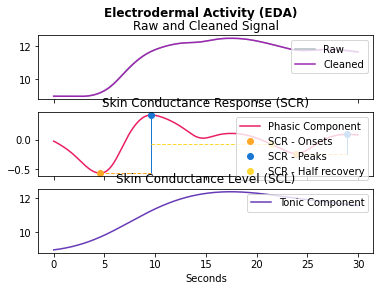

   number of peaks  mean time between peaks  median time between peaks  \
0               14                   107573                     108413   

   mean height of peaks  median height of peaks  variance height of peaks  
0              0.272222                0.307527                  0.030599  


In [6]:
processed_gsr,infos = nk2.eda_process(completeGsr[15],sampling_rate=1000) #processes the GSR, currently only doing one item to make sure it works properly
plot = nk2.eda_plot(processed_gsr[:30000], sampling_rate=1000) #plots the signal on a graph

gsr_dict = nk2.eda_findpeaks(processed_gsr) #finding peaks, time of the peaks and magnitude of peaks

peaktime = gsr_dict['SCR_Peaks'] #time of peaks
numpeaks = len(peaktime) #number of peaks
timebetween = []
lastPeak = 0;
for peaks in peaktime: # going through all the peaks in the exrtacted data
    if lastPeak != 0:
        timebetween.append(peaks-lastPeak) #finding the time between the peaks
    else:
        lastPeak = peaks
meantbpeaks = statistics.mean(timebetween) #mean time between peaks
mediantbpeaks = statistics.median(timebetween) # median time between peaks
meanheightpeaks = statistics.mean(gsr_dict['SCR_Height']) #mean magnitide of peaks
medianheightpeaks = statistics.median(gsr_dict['SCR_Height']) #median magnitide of peaks
varheightpeaks = statistics.variance(gsr_dict['SCR_Height']) #variance magnitide of peaks
sdheightpeaks = statistics.stdev(gsr_dict['SCR_Height']) #variance magnitide of peaks
maxGSR = max()

d = {'number of peaks':numpeaks,
     'mean time between peaks':meantbpeaks,
     'median time between peaks':mediantbpeaks,
     'mean height of peaks': meanheightpeaks,
     'median height of peaks': medianheightpeaks,
     'variance height of peaks': varheightpeaks}
#adding to dataframe to be stored as csv later
procecssed_gsr = pd.DataFrame([d])

print(procecssed_gsr)
#print(gsr_dict)
#print(completeGSRData)

In [1]:
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images
plt.rcParams['font.size']= 13
# Preprocess the data (filter, find peaks, etc.)

eda = completeGsr[0]
df, info = nk2.eda_process(eda)
gf = nk2.eda_intervalrelated(df)
print(gf)

NameError: name 'plt' is not defined

Ryans code for feature extraction of ecg and gsr


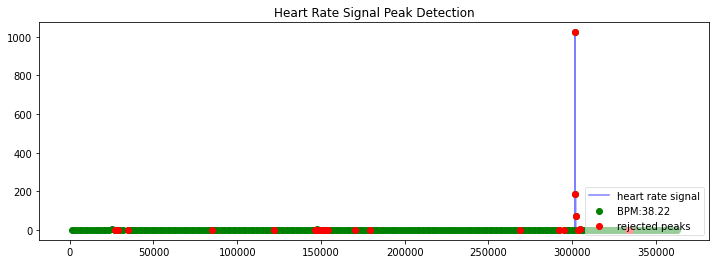

bpm: 38.223652
ibi: 1569.708738
sdnn: 95.520255
sdsd: 40.618995
rmssd: 54.211261
pnn20: 0.613402
pnn50: 0.273196
hr_mad: 52.000000
sd1: 38.278575
sd2: 126.396384
s: 15199.884374
sd1/sd2: 0.302845
breathingrate: 0.043295
[3130, 14, 1531, 1562.0, 763.8231578947368, 78.55952204122724, 245.88477038201688, 469.0716506137756, 102262.92576107997, 0.47890295358649787, 0.4810126582278481, 0.9956140350877193, 1.1947501380775508e-09, 2.2318347547265527e-06, 4.403522462157567e-11, 7.783807025502648e-09, 1.2106241040656603e-07, 2.4512967390222253e-09, 0.9196430981903682, -0.74181612398837, 9.404758347822003e-07]


In [6]:
#Function to extract features from an ECG signal.

def ECGFeatures(ecg):
    sr = 1000 #samplerate in Hz
    temp = []

    #Filter the signal
    sig = hp.filter_signal(ecg, 10, sr)

    rr_index=[]
    rr_diff=[]

    #Calculate RR
    def calcRR(sigRR):
        enhanced = hp.enhance_peaks(sigRR, iterations=3)
        enhanced_data, measures = hp.process(enhanced, sr)

        #visualise in plot of custom size
        plt.figure(figsize=(12,4))
        hp.plotter(enhanced_data, measures)

        #display computed measures
        for measure in measures.keys():
            print('%s: %f' %(measure, measures[measure]))


        for peak in enhanced_data['peaklist']:
            if sigRR[peak] > 0:
                rr_index.append(peak)

    calcRR(sig)
    if len(rr_index) < 2:
        rr_index=[]
        sig = hp.filter_signal(ecg, 5, 1000)
        calcRR(sig)

    for x in range(len(rr_index)-1):
        rr_diff.append(rr_index[x+1]-rr_index[x])

    #MaxRR, MinRR
    MaxRR = max(rr_diff)
    MinRR = min(rr_diff)

    #MeanRR, MedianRR
    MeanRR = statistics.mean(rr_diff)
    MedianRR = statistics.median(sorted(rr_diff))

    temp.append(MaxRR)
    temp.append(MinRR)
    temp.append(MeanRR)
    temp.append(MedianRR)

    #Extract the Features
    res = pysiology.electrocardiography.analyzeECG(sig,sr)

    #Append all features extracted from pysiology library
    temp.append(res['ibi'])
    temp.append(res['bpm'])
    temp.append(res['sdnn'])
    temp.append(res['sdsd'])
    temp.append(res['rmssd'])
    temp.append(res['pnn50'])
    temp.append(res['pnn20'])
    temp.append(res['pnn50pnn20'])
    temp.append(res['frequencyAnalysis']['LF'])
    temp.append(res['frequencyAnalysis']['HF'])
    temp.append(res['frequencyAnalysis']['VLF'])
    temp.append(res['frequencyAnalysisFiltered']['LF'])
    temp.append(res['frequencyAnalysisFiltered']['HF'])
    temp.append(res['frequencyAnalysisFiltered']['VLF'])

    #Append the maximumn, minimum and mean of the signal
    temp.append(max(sig))
    temp.append(min(sig))
    temp.append(statistics.mean(sig))

    return temp

#Function to extract features from an GSR signal.


def GSRFeatures(gsr):
    #Filter the Signal
    gsr = hp.filter_signal(gsr, 0.1, 1000)

    #Average
    avg = statistics.mean(gsr)

    #Variance
    temp=0
    for x in gsr:
        temp = temp + (x-avg)**2
    var = temp/len(gsr)

    #Standard deviation of Skin conductance
    std = math.sqrt(var)

    #The number of local maxima and minima
    sci.
    peaks = signal.find_peaks(gsr)
    valleys = signal.find_peaks(gsr*(-1))
    numPEAKS = len(peaks[0])/len(gsr)
    numVALLEYS = len(valleys[0])/len(gsr)


    ### Dont worry about this feature, its not implemented properly ###
    #Mean conductivity difference (GF − GB) for each consecutive pair of local minimum-maximum
    GFGB = 0
    if peaks == True:
        if peaks[0][0] < valleys[0][0]:
            #Find difference between peaks where peak comes first
            for x in range(len(peaks[0][1:])):
                GFGB = GFGB + (gsr[peaks[0][x]] - gsr[valleys[0][x]])
            GFGB = GFGB/len(peaks[0][1:])
        else:
            #Find difference between peaks where Valley comes first
            for x in range(len(peaks[0])):
                GFGB = GFGB + (gsr[peaks[0][x]] - gsr[valleys[0][x]])
            GFGB = GFGB/len(peaks[0])

    #Global maximum GSRmax and minimum GSRmin
    GSRmax = max(gsr)
    GSRmin = min(gsr)

    #Difference of global maximum GSRmax and minimum GSRmin
    GSRdiff = GSRmax-GSRmin

    #The ratio between the number of maxima and stimuli duration (peaks∕time)
    ratio = numPEAKS/len(gsr)

    return [avg, var, std, numPEAKS, numVALLEYS, GFGB, GSRmax, GSRmin, ratio]


arr = completeEcg[0]
print(ECGFeatures(arr))